# Diamond Price Analysis

### Author: Eren ERİŞ

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pycaret.regression import*

from sklearn.model_selection import train_test_split

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 088F-1ED4

 Directory of C:\Users\EREN\Documents\YapayZeka\GitHub\Diamond Price Analysis

12/16/2023  02:27 PM    <DIR>          .
12/16/2023  02:27 PM    <DIR>          ..
12/16/2023  02:25 PM    <DIR>          .ipynb_checkpoints
12/16/2023  02:27 PM               760 Diamond Price Analysis.ipynb
09/20/2019  04:24 PM         3,192,560 diamonds.csv
               2 File(s)      3,193,320 bytes
               3 Dir(s)  63,242,747,904 bytes free


In [3]:
df = pd.read_csv("diamonds.csv")

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df["size"] = df["x"] * df["y"] * df["z"]
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


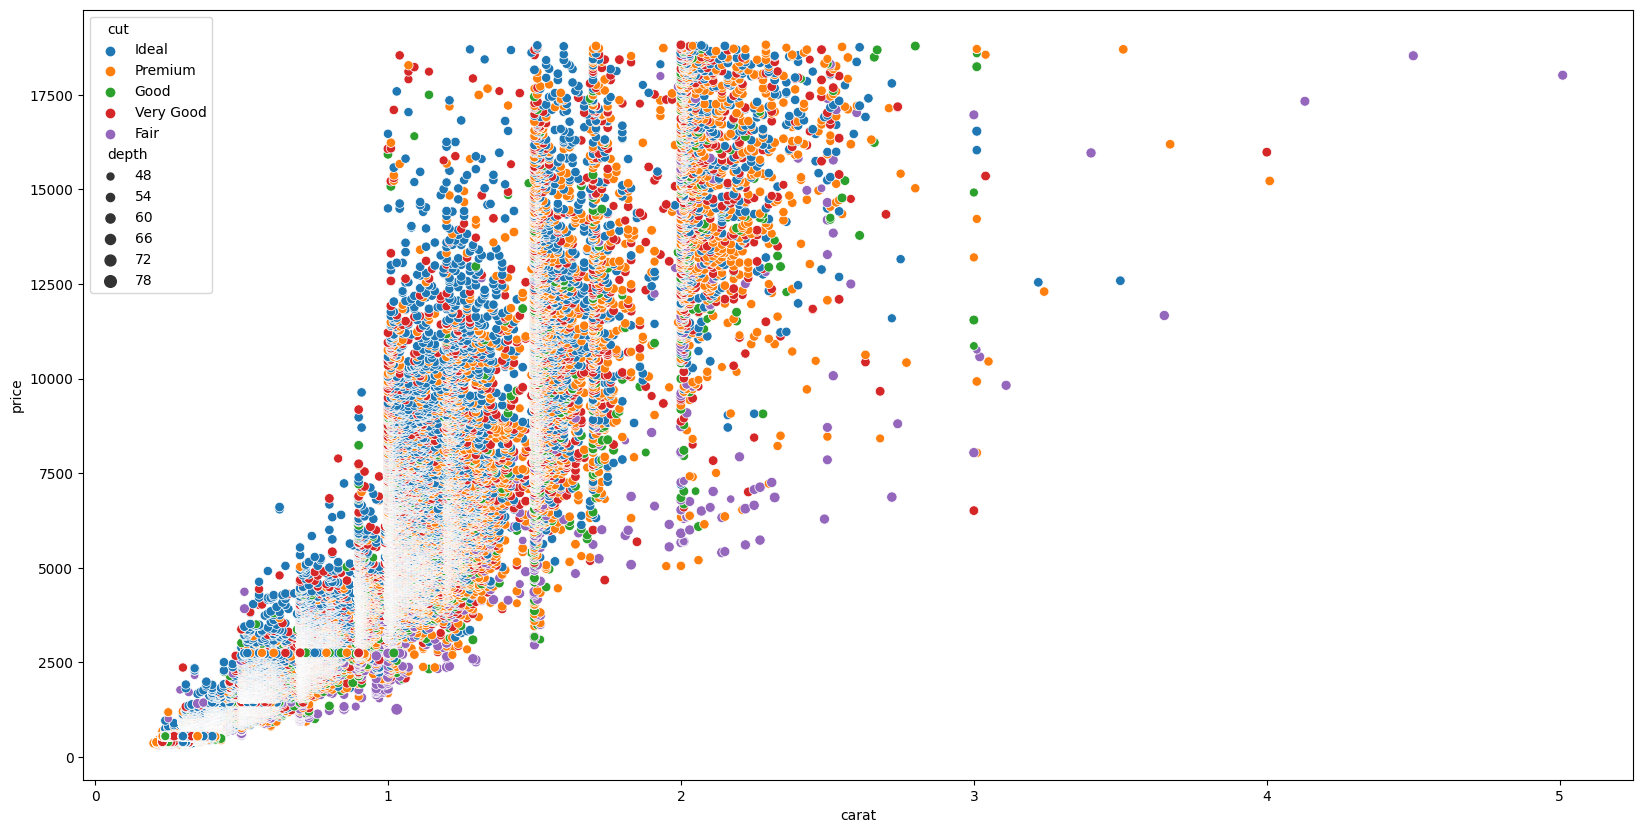

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
figure = sns.scatterplot(df, x="carat",
                    y="price", size="depth", 
                    hue= "cut")


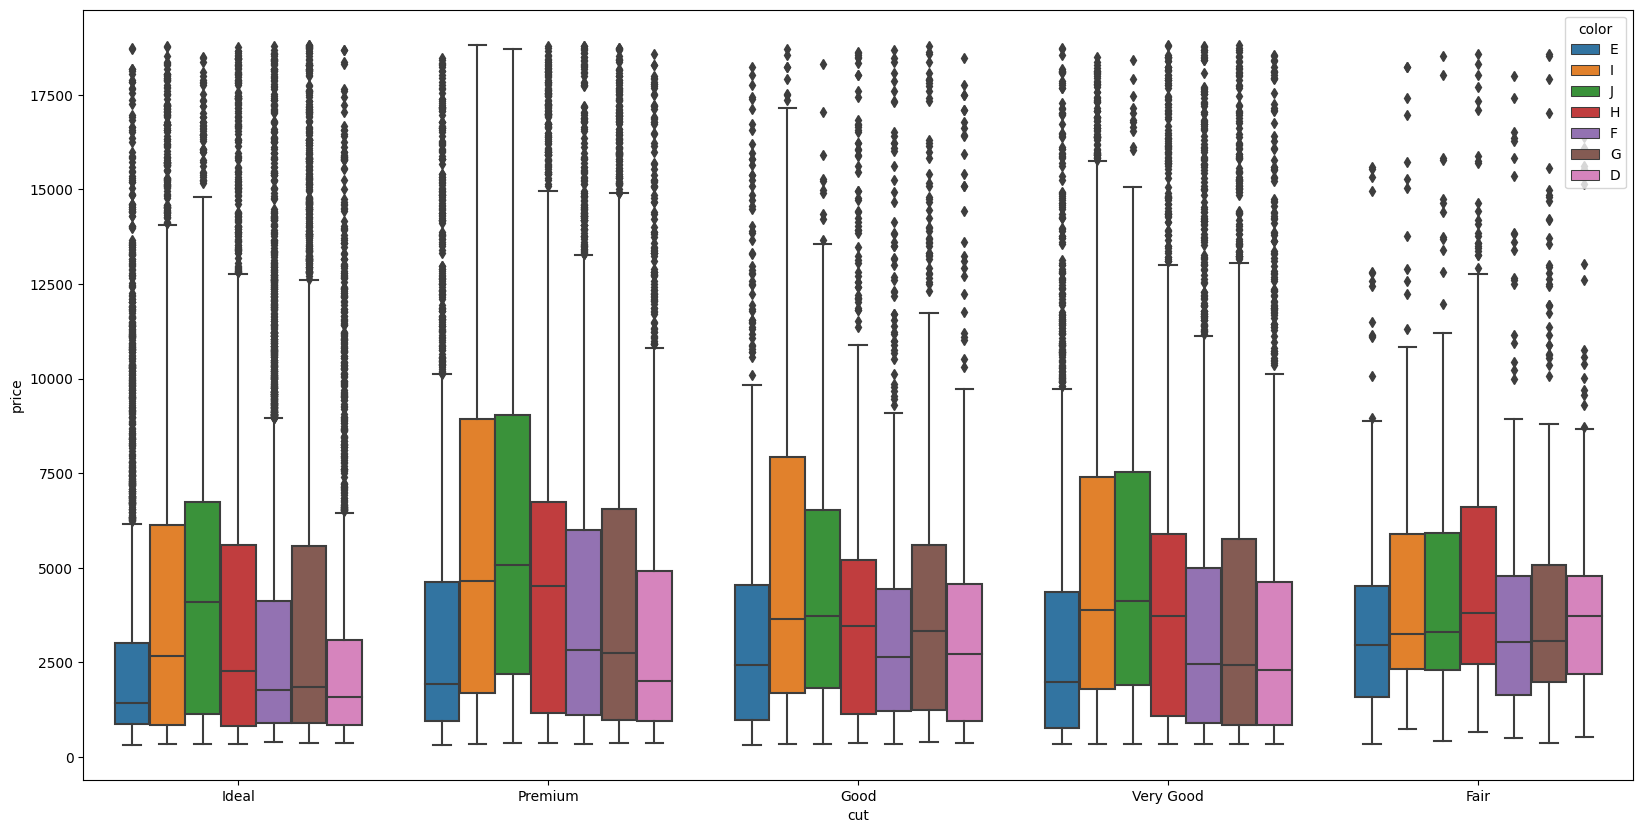

In [11]:
fig = sns.boxplot(df, x="cut", 
             y="price", 
             hue="color")

In [12]:
df.corr()

C:\Users\EREN\AppData\Local\Temp\ipykernel_25532\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,carat,depth,table,price,x,y,z,size
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208,-0.367016
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.976308
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.009157
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.167400
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.902385
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.956564
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.975143
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.950065
size,-0.367016,0.976308,0.009157,0.167400,0.902385,0.956564,0.975143,0.950065,1.000000


In [14]:
df = pd.get_dummies(df,drop_first=True)

In [17]:
df.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,size,cut_Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,38.202030,0,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,34.505856,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,38.076885,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,46.724580,0,...,0,1,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,51.917250,1,...,0,0,1,0,0,1,0,0,0,0


In [19]:
df.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'size',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [24]:
setup(data=df,target='price')

,Description,Value
0,Session id,7495
1,Target,price
2,Target type,Regression
3,Original data shape,"(53940, 26)"
4,Transformed data shape,"(53940, 26)"
5,Transformed train set shape,"(37758, 26)"
6,Transformed test set shape,"(16182, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [25]:
best_model  =compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,3.4414,2055.3856,43.5968,0.9999,0.0435,0.0038,0.1350
rf,Random Forest Regressor,3.8001,1085.1014,31.8515,0.9999,0.0336,0.0050,5.9790
et,Extra Trees Regressor,7.2109,4340.3011,61.6249,0.9997,0.0317,0.0053,3.4950
lightgbm,Light Gradient Boosting Machine,31.0300,10595.9515,82.7814,0.9993,0.0484,0.0198,0.2420
knn,K Neighbors Regressor,6.3717,35019.5362,147.6861,0.9978,0.0482,0.0031,0.2980
gbr,Gradient Boosting Regressor,137.2348,55309.1158,234.9077,0.9965,0.1116,0.0745,2.3540
ada,AdaBoost Regressor,338.4411,201350.1101,447.9198,0.9873,0.2411,0.1902,1.1650
lr,Linear Regression,720.1072,1245305.9238,1114.7576,0.9215,0.5875,0.3799,0.5280
br,Bayesian Ridge,719.9719,1245326.7290,1114.7661,0.9215,0.5874,0.3797,0.0620
ridge,Ridge Regression,719.3253,1245491.7696,1114.8361,0.9214,0.5861,0.3789,0.0390


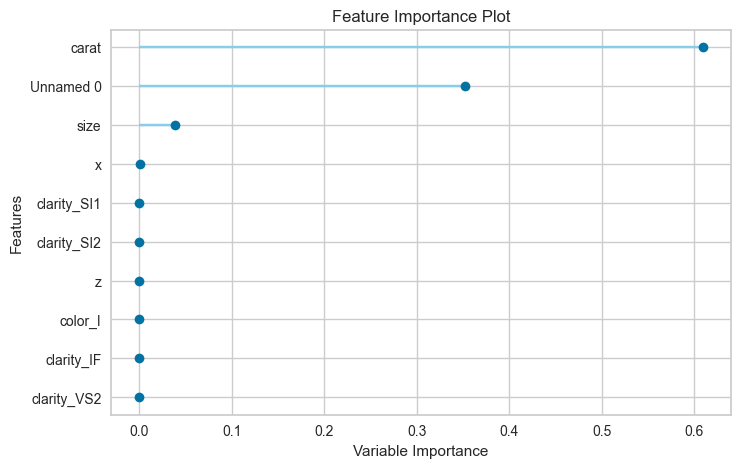

In [26]:
plot_model(best_model,plot="feature")